<a href="https://colab.research.google.com/github/IT24102008/PG151MLProject/blob/IT24100618/IT24100618.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
file_path = '/content/preprocessed_stroke_data.csv'
data = pd.read_csv(file_path)

# Prepare features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


Accuracy: 0.9472
Precision: 0.1667
Recall: 0.0200
F1-score: 0.0357


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = '/content/preprocessed_stroke_data.csv'
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Split data (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to training data only to generate synthetic minority class samples
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)

# Predict on original test data
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


Accuracy: 0.8229
Precision: 0.1170
Recall: 0.4000
F1-score: 0.1810


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = '/content/preprocessed_stroke_data.csv'
data = pd.read_csv(file_path)

# Separate stroke and non-stroke data
stroke_data = data[data['stroke'] == 1]
non_stroke_data = data[data['stroke'] == 0]

# Take first 250 from each (or all if less than 250)
stroke_sample = stroke_data.iloc[:250]
non_stroke_sample = non_stroke_data.iloc[:250]

# Combine to form balanced dataset
balanced_data = pd.concat([stroke_sample, non_stroke_sample])

# Split into features and target
X = balanced_data.drop('stroke', axis=1)
y = balanced_data['stroke']

# Split into train and test (20% test, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE only if imbalance remains in training set
smote = SMOTE(random_state=42)

# Check class counts in train set
train_counts = y_train.value_counts()
if train_counts.min() / train_counts.max() < 0.8:
    X_train, y_train = smote.fit_resample(X_train, y_train)

# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


Accuracy: 0.6800
Precision: 0.6406
Recall: 0.8200
F1-score: 0.7193


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load full preprocessed stroke dataset
file_path = 'preprocessed_stroke_data.csv'
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Split data into training and test sets (80/20), stratified to maintain target distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize KNN classifier with k=5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on full training data
knn.fit(X_train, y_train)

# Predict stroke on test data
y_pred = knn.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


Accuracy: 0.9472
Precision: 0.1667
Recall: 0.0200
F1-score: 0.0357


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from imblearn.combine import SMOTEENN

# Load full dataset
data = pd.read_csv('/content/preprocessed_stroke_data.csv')
X = data.drop('stroke', axis=1)
y = data['stroke']

# Scale features (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Balance data with SMOTE + Edited Nearest Neighbours (combine oversampling + cleaning)
smote_enn = SMOTEENN(random_state=42)
X_balanced, y_balanced = smote_enn.fit_resample(X_scaled, y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {'n_neighbors': [3,5,7,9],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=5)
grid = GridSearchCV(knn, param_grid, cv=cv, scoring='f1')
grid.fit(X_train, y_train)

# Best model evaluation
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test)
print(classification_report(y_test, y_pred))
print("Best K:", grid.best_params_['n_neighbors'])


              precision    recall  f1-score   support

           0       1.00      0.97      0.98       791
           1       0.97      1.00      0.99       909

    accuracy                           0.98      1700
   macro avg       0.99      0.98      0.98      1700
weighted avg       0.98      0.98      0.98      1700

Best K: 3


              precision    recall  f1-score   support

           0       1.00      0.97      0.98       791
           1       0.97      1.00      0.99       909

    accuracy                           0.98      1700
   macro avg       0.99      0.98      0.98      1700
weighted avg       0.98      0.98      0.98      1700

Best K: 3


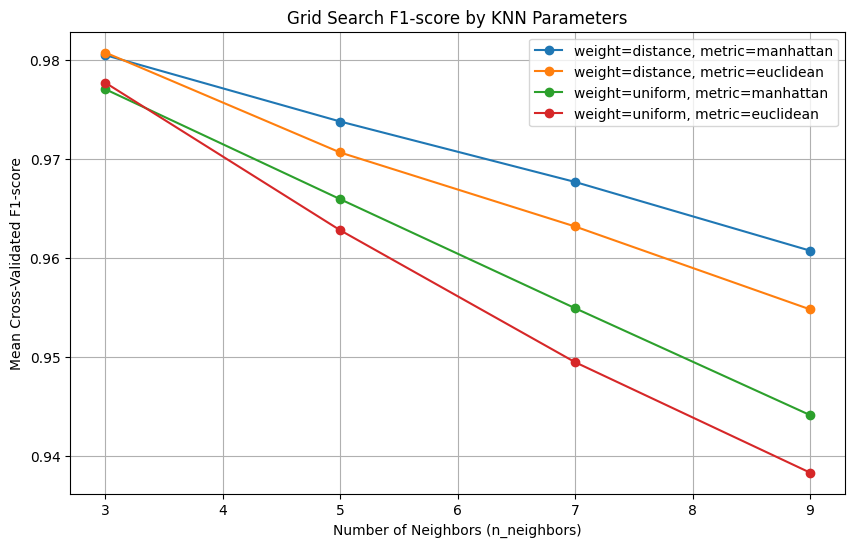

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from imblearn.combine import SMOTEENN

# Load full dataset
data = pd.read_csv('/content/preprocessed_stroke_data.csv')
X = data.drop('stroke', axis=1)
y = data['stroke']

# Scale features (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Balance data with SMOTE + Edited Nearest Neighbours (combine oversampling + cleaning)
smote_enn = SMOTEENN(random_state=42)
X_balanced, y_balanced = smote_enn.fit_resample(X_scaled, y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {'n_neighbors': [3,5,7,9],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=5)
grid = GridSearchCV(knn, param_grid, cv=cv, scoring='f1')
grid.fit(X_train, y_train)

# Best model evaluation
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test)
print(classification_report(y_test, y_pred))
print("Best K:", grid.best_params_['n_neighbors'])

# Plot validation F1-scores for each parameter combination
results = grid.cv_results_
param_names = ['n_neighbors', 'weights', 'metric']

# Extract mean test scores and parameters
mean_test_scores = results['mean_test_score']
params = results['params']

# Prepare lists for plotting
kn_values = [p['n_neighbors'] for p in params]
weights = [p['weights'] for p in params]
metric = [p['metric'] for p in params]

# Plot F1 score variation by n_neighbors, separate lines for weights and metrics
plt.figure(figsize=(10, 6))
for w in set(weights):
    for m in set(metric):
        indices = [i for i, (w_i, m_i) in enumerate(zip(weights, metric)) if w_i == w and m_i == m]
        scores = [mean_test_scores[i] for i in indices]
        kns = [kn_values[i] for i in indices]
        plt.plot(kns, scores, marker='o', label=f'weight={w}, metric={m}')

plt.title('Grid Search F1-score by KNN Parameters')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean Cross-Validated F1-score')
plt.legend()
plt.grid(True)
plt.show()
